In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avito-ml-cup-2025-recsys-data/text_features.pq
/kaggle/input/avito-ml-cup-2025-recsys-data/submit_example.csv
/kaggle/input/avito-ml-cup-2025-recsys-data/test_users.pq
/kaggle/input/avito-ml-cup-2025-recsys-data/cat_features.pq
/kaggle/input/avito-ml-cup-2025-recsys-data/clickstream.pq
/kaggle/input/avito-ml-cup-2025-recsys-data/events.pq


In [2]:
!pip install polars==1.21.0

In [3]:
import polars as pl
import pandas as pd

In [4]:
submit_example = pd.read_csv('/kaggle/input/avito-ml-cup-2025-recsys-data/submit_example.csv')

In [5]:
submit_example.head(10)

,cookie,node
0,36835,279315
1,36835,279318
2,36835,303222
3,36835,279316
4,36835,272387
5,36835,303229
6,36835,283292
7,36835,310795
8,36835,310793
9,36835,303237


In [6]:
df_clickstream = pl.read_parquet('/kaggle/input/avito-ml-cup-2025-recsys-data/clickstream.pq')  
df_event = pl.read_parquet('/kaggle/input/avito-ml-cup-2025-recsys-data/events.pq')         
df_test_users = pl.read_parquet('/kaggle/input/avito-ml-cup-2025-recsys-data/test_users.pq')    
df_cat_features = pl.read_parquet('/kaggle/input/avito-ml-cup-2025-recsys-data/cat_features.pq')  
df_text_features = pl.read_parquet('/kaggle/input/avito-ml-cup-2025-recsys-data/text_features.pq') 

In [7]:
def info(df):
    print(df.schema)
    print(df.shape)
    print(df.head(10))
    print(df.describe())
    print(df.null_count())

In [8]:
info(df_clickstream)

Schema([('cookie', Int64), ('item', Int64), ('event', Int64), ('event_date', Datetime(time_unit='ns', time_zone=None)), ('platform', Int64), ('surface', Int64), ('node', UInt32)])
(68806152, 7)
shape: (10, 7)
┌────────┬──────────┬───────┬─────────────────────┬──────────┬─────────┬────────┐
│ cookie ┆ item     ┆ event ┆ event_date          ┆ platform ┆ surface ┆ node   │
│ ---    ┆ ---      ┆ ---   ┆ ---                 ┆ ---      ┆ ---     ┆ ---    │
│ i64    ┆ i64      ┆ i64   ┆ datetime[ns]        ┆ i64      ┆ i64     ┆ u32    │
╞════════╪══════════╪═══════╪═════════════════════╪══════════╪═════════╪════════╡
│ 0      ┆ 19915558 ┆ 17    ┆ 2025-02-05 02:30:59 ┆ 3        ┆ 2       ┆ 115659 │
│ 0      ┆ 2680232  ┆ 17    ┆ 2025-01-24 21:16:57 ┆ 3        ┆ 2       ┆ 115829 │
│ 1      ┆ 4247649  ┆ 17    ┆ 2025-01-29 23:00:58 ┆ 2        ┆ 2       ┆ 7      │
│ 1      ┆ 4247649  ┆ 17    ┆ 2025-02-17 14:55:17 ┆ 2        ┆ 2       ┆ 7      │
│ 1      ┆ 2171135  ┆ 17    ┆ 2025-01-17 19:23:29 ┆ 2

In [9]:
info(df_event)

Schema([('event', Int64), ('is_contact', Int64)])
(19, 2)
shape: (10, 2)
┌───────┬────────────┐
│ event ┆ is_contact │
│ ---   ┆ ---        │
│ i64   ┆ i64        │
╞═══════╪════════════╡
│ 0     ┆ 1          │
│ 11    ┆ 0          │
│ 4     ┆ 1          │
│ 16    ┆ 0          │
│ 15    ┆ 1          │
│ 3     ┆ 0          │
│ 12    ┆ 0          │
│ 18    ┆ 1          │
│ 5     ┆ 1          │
│ 8     ┆ 0          │
└───────┴────────────┘
shape: (9, 3)
┌────────────┬──────────┬────────────┐
│ statistic  ┆ event    ┆ is_contact │
│ ---        ┆ ---      ┆ ---        │
│ str        ┆ f64      ┆ f64        │
╞════════════╪══════════╪════════════╡
│ count      ┆ 19.0     ┆ 19.0       │
│ null_count ┆ 0.0      ┆ 0.0        │
│ mean       ┆ 9.631579 ┆ 0.684211   │
│ std        ┆ 6.048053 ┆ 0.477567   │
│ min        ┆ 0.0      ┆ 0.0        │
│ 25%        ┆ 5.0      ┆ 0.0        │
│ 50%        ┆ 10.0     ┆ 1.0        │
│ 75%        ┆ 15.0     ┆ 1.0        │
│ max        ┆ 19.0     ┆ 1.0        │

In [10]:
info(df_test_users)

Schema([('cookie', Int64)])
(92319, 1)
shape: (10, 1)
┌────────┐
│ cookie │
│ ---    │
│ i64    │
╞════════╡
│ 52564  │
│ 105000 │
│ 57152  │
│ 87303  │
│ 37755  │
│ 129902 │
│ 65542  │
│ 66590  │
│ 111026 │
│ 143535 │
└────────┘
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ cookie       │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 92319.0      │
│ null_count ┆ 0.0          │
│ mean       ┆ 75192.415429 │
│ std        ┆ 43297.982566 │
│ min        ┆ 1.0          │
│ 25%        ┆ 37653.0      │
│ 50%        ┆ 75255.0      │
│ 75%        ┆ 112733.0     │
│ max        ┆ 149999.0     │
└────────────┴──────────────┘
shape: (1, 1)
┌────────┐
│ cookie │
│ ---    │
│ u32    │
╞════════╡
│ 0      │
└────────┘


In [11]:
info(df_cat_features)

Schema([('item', Int64), ('location', Int64), ('category', Int64), ('clean_params', String), ('node', UInt32)])
(22646691, 5)
shape: (10, 5)
┌──────┬──────────┬──────────┬─────────────────────────────────┬────────┐
│ item ┆ location ┆ category ┆ clean_params                    ┆ node   │
│ ---  ┆ ---      ┆ ---      ┆ ---                             ┆ ---    │
│ i64  ┆ i64      ┆ i64      ┆ str                             ┆ u32    │
╞══════╪══════════╪══════════╪═════════════════════════════════╪════════╡
│ 9    ┆ 8385     ┆ 57       ┆ [{"attr":1157,"value":664427},… ┆ 194747 │
│ 17   ┆ 2707     ┆ 35       ┆ [{"attr":2140,"value":501466},… ┆ 352905 │
│ 144  ┆ 8383     ┆ 8        ┆ [{"attr":802,"value":35791},{"… ┆ 17188  │
│ 202  ┆ 5397     ┆ 57       ┆ [{"attr":1157,"value":490527},… ┆ 194766 │
│ 236  ┆ 2105     ┆ 64       ┆ [{"attr":112,"value":420797},{… ┆ 153951 │
│ 237  ┆ 7000     ┆ 28       ┆ [{"attr":1923,"value":444857},… ┆ 19624  │
│ 262  ┆ 2269     ┆ 24       ┆ [{"attr":1747,

In [12]:
info(df_text_features)

Schema([('item', Int64), ('title_projection', Array(Int8, shape=(64,)))])
(22646691, 2)
shape: (10, 2)
┌──────┬────────────────────┐
│ item ┆ title_projection   │
│ ---  ┆ ---                │
│ i64  ┆ array[i8, 64]      │
╞══════╪════════════════════╡
│ 9    ┆ [-128, 90, … -36]  │
│ 17   ┆ [-128, 127, … -3]  │
│ 144  ┆ [-128, 97, … 18]   │
│ 202  ┆ [-128, 127, … 15]  │
│ 236  ┆ [-128, 29, … -128] │
│ 237  ┆ [-128, -98, … -97] │
│ 262  ┆ [-128, 127, … 125] │
│ 280  ┆ [-28, -128, … -67] │
│ 417  ┆ [127, 127, … -27]  │
│ 429  ┆ [127, 127, … -81]  │
└──────┴────────────────────┘
shape: (9, 3)
┌────────────┬─────────────┬──────────────────┐
│ statistic  ┆ item        ┆ title_projection │
│ ---        ┆ ---         ┆ ---              │
│ str        ┆ f64         ┆ f64              │
╞════════════╪═════════════╪══════════════════╡
│ count      ┆ 2.2646691e7 ┆ 2.2646691e7      │
│ null_count ┆ 0.0         ┆ 0.0              │
│ mean       ┆ 1.4402e7    ┆ null             │
│ std        ┆ 8.31

In [13]:
uniq_users = df_clickstream['cookie'].n_unique()
print(f'Number of unique users: {uniq_users}')
print(f'Total users: {len(df_clickstream)}')
print(f'Average number of interaction events per user: {len(df_clickstream) / uniq_users}')

Number of unique users: 134294
Total users: 68806152
Average number of interaction events per user: 512.354624927398


/tmp/ipykernel_13/3186990507.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  uniq_users_counts = df_clickstream.group_by('cookie').agg(pl.count().alias('cnt')).to_pandas()


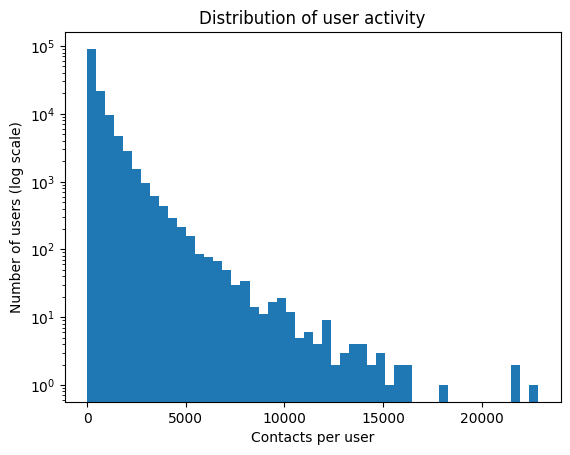

In [14]:
import matplotlib.pyplot as plt
uniq_users_counts = df_clickstream.group_by('cookie').agg(pl.count().alias('cnt')).to_pandas()
plt.hist(uniq_users_counts['cnt'], bins=50)
plt.yscale('log')
plt.xlabel('Contacts per user')
plt.ylabel('Number of users (log scale)')
plt.title('Distribution of user activity')
plt.show()

**First 5,000 contacts:**

* A visible peak (\~10² users) → the majority of users perform only a few actions.
* Typical for 90–95% of the audience (e.g., 1–5 visits).

**5,000–10,000 contacts:**

* \~100 users → a small but notable group with high activity.
* Possibly loyal customers or users in extended sessions.

**Rare outliers (15,000–20,000 contacts):**

* Only 3 users → extremely high activity.
* Possible reasons:

  * Bots (e.g., data scrapers)
  * Technical users (e.g., admins, API integrations)
  * Example: if this is website data, 20K contacts ≈ 55 actions per day for a full year.


Let’s examine the outlier users separately

In [15]:
high_activity_users = uniq_users_counts[uniq_users_counts["cnt"] > 12000]
print(high_activity_users)

        cookie    cnt
79       31003  16341
6975     80750  14569
15239    76302  13268
18288   106596  15734
22085    18653  12223
23001   123433  12004
29688    42209  13625
35122   131368  15940
36161    10544  12143
37174   139243  12812
44695    23614  13086
51454   100312  14533
56879    81716  21711
61561    97808  13344
61667    67889  13819
64490     6003  21680
74857   138038  22864
75228    53685  12873
77734    84110  14782
82383   144135  13707
82967   116470  18030
89246   103159  12096
90629   114059  16023
92023    47457  12325
95253    90083  12107
96970   125116  15376
97703   100488  12450
100071  112222  14867
116006   69850  14894
117103   60165  12611
117814  105631  13778
124314  128889  12104
126520   71624  13839
128974  109534  13917


In [16]:
super_active_count = len(uniq_users_counts[uniq_users_counts["cnt"] > 12000])
print(f"Users with over 12,000 interactions: {super_active_count}")

Users with over 12,000 interactions: 34


In [17]:
len(df_test_users)

92319

In [18]:
super_active_cookies = uniq_users_counts[uniq_users_counts["cnt"] > 12000]["cookie"].tolist()
super_active_cookies_pl = pl.Series("cookie", super_active_cookies)

existing_in_test = df_test_users.filter(
    pl.col("cookie").is_in(super_active_cookies_pl)
)

print(f"\nin test_users: {existing_in_test.height} out {super_active_count}")
print(existing_in_test)


in test_users: 32 out 34
shape: (32, 1)
┌────────┐
│ cookie │
│ ---    │
│ i64    │
╞════════╡
│ 42209  │
│ 76302  │
│ 106596 │
│ 18653  │
│ 31003  │
│ …      │
│ 128889 │
│ 71624  │
│ 109534 │
│ 105631 │
│ 60165  │
└────────┘


/tmp/ipykernel_13/3853237727.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  node_counts = df_clickstream.group_by('node').agg(pl.count().alias('cnt')).to_pandas()


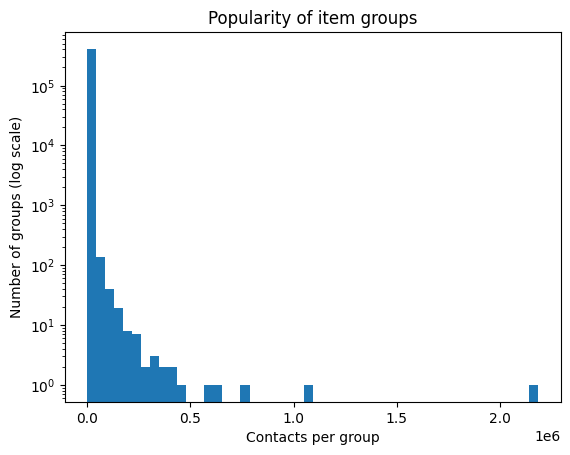

In [19]:
node_counts = df_clickstream.group_by('node').agg(pl.count().alias('cnt')).to_pandas()
plt.hist(node_counts['cnt'], bins=50)
plt.yscale('log')
plt.xlabel('Contacts per group')
plt.ylabel('Number of groups (log scale)')
plt.title('Popularity of item groups')
plt.show()

**X-axis ("Contacts per group"):**

* A peak around 0.5 indicates that most item groups have very low engagement (roughly 0–1 contact).
* The absence of values beyond 1 (except for a few rare outliers) suggests that only a handful of groups generate noticeable activity.

**Y-axis ("Number of groups (log scale)"):**

* The logarithmic scale emphasizes that the number of low-activity groups exceeds even moderately popular ones by orders of magnitude.


In [20]:
df_event['event'].n_unique()

19

In [21]:
df_event['is_contact'].n_unique()

2

In [22]:
event_contact_mapping = (
    df_event
    .group_by("event")
    .agg(pl.col("is_contact").unique().sort())
    .sort("event")
)

In [23]:
event_contact_mapping.head(10)

event,is_contact
i64,list[i64]
0,[1]
1,[1]
2,[1]
3,[0]
4,[1]
5,[1]
6,[1]
8,[0]
9,[1]


In [24]:
event_contact_mapping.tail(10)

event,is_contact
i64,list[i64]
10,[1]
11,[0]
12,[0]
13,[1]
14,[1]
15,[1]
16,[0]
17,[0]
18,[1]


/tmp/ipykernel_13/3559457963.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  ]).group_by('day').count().to_pandas()


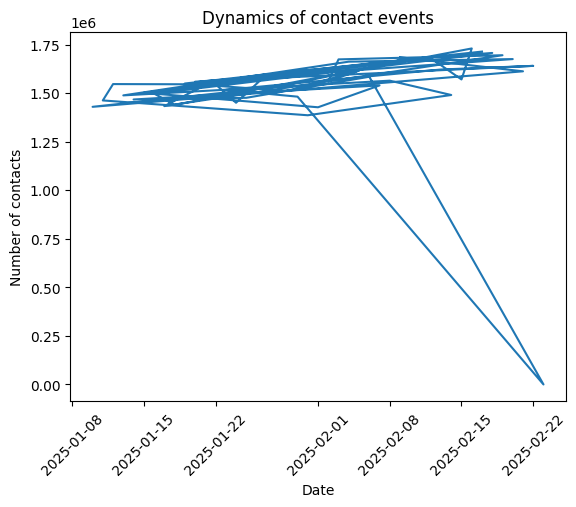

In [25]:
dates = df_clickstream.select([
    pl.col('event_date').dt.date().alias('day')
]).group_by('day').count().to_pandas()
plt.plot(dates['day'], dates['count'])
plt.xlabel('Date')
plt.ylabel('Number of contacts')
plt.title('Dynamics of contact events')
plt.xticks(rotation=45)
plt.show()